Họ và tên:  Bùi Hoàng Phi  
MSSV:       2011799
# **Xử lí ảnh số và thị giác máy tính**
**Project 2: Low and High Pass Filter**

# Công thức

## Công thức model filter hình ảnh
Với G(u,v) là kết quả đầu ra của phép biến đổi hình ảnh. u,v là các giá trị tương ứng trong trục toạ độ. Ta có:
$$
    G\left ( u,v \right )=H\left ( u,v \right )F\left ( u,v \right )
$$
Trong đó: 
- H(u,v): hàm biến đổi filter
- F(u,v): phép biến đổi Fourier đối với hình ảnh 
## Công thức cho Low Pass Filter
Tôi xin giới thiệu hai công thức cho hàm biến đổi Low Pass Filter là Ideal Low Pass Filter và Gaussian Low Pass Filter
### Ideal Low Pass Filter
Với H(u,v) là hàm biến đổi Ideal Low Pass Filter, ta có:
$$
    H\left ( u,v \right )=\left\{\begin{matrix}
        1 & \mathit{ if } & D\left ( u,v \right )\leq D_{0}
        \\ 
        0 & \mathit{ if } & D\left ( u,v \right )>  D_{0}
        \end{matrix}\right.
$$
Trong đó, $D_0$ là giá trị cut-off của filter và $D\left ( u,v \right )$ là khoảng cách Euclid của vị trí (u,v) đối với tâm của hình ảnh

### Gaussian Low Pass Filter
Với H(u,v) là hàm biến đổi Gaussian Low Pass Filter, ta có:
$$
    H\left ( u,v \right )= e^{\frac{-D^{2}\left ( u,v \right )}{2D_{0}^{2}}}
$$
Trong đó, $D_0$ là giá trị cut-off của filter và $D\left ( u,v \right )$ là khoảng cách Euclid của vị trí (u,v) đối với tâm của hình ảnh

## Công thức cho High Pass Filter
Tôi xin giới thiệu hai công thức cho hàm biến đổi High Pass Filter là Ideal High Pass Filter và Gaussian High Pass Filter. 
Bởi vì High Pass Filter là một đảo ngược của Low Pass Filter, nên ta có công thức liên hệ giữa High Pass Filter $H_{hp}\left ( u,v \right )$ và Low Pass Filter $H_{lp}\left ( u,v \right )$
$$
    H_{hp}\left ( u,v \right )= 1 - H_{lp}\left ( u,v \right )
$$
### Ideal High Pass Filter
Với H(u,v) là hàm biến đổi Ideal High Pass Filter, ta có:
$$
    H\left ( u,v \right )=\left\{\begin{matrix}
        1 & \mathit{ if } & D\left ( u,v \right )>  D_{0}
        \\ 
        0 & \mathit{ if } & D\left ( u,v \right )\leq D_{0}
        \end{matrix}\right.
$$
Trong đó, $D_0$ là giá trị cut-off của filter và $D\left ( u,v \right )$ là khoảng cách Euclid của vị trí (u,v) đối với tâm của hình ảnh

### Gaussian High Pass Filter
Với H(u,v) là hàm biến đổi Gaussian High Pass Filter, ta có:
$$
    H\left ( u,v \right )= 1 - e^{\frac{-D^{2}\left ( u,v \right )}{2D_{0}^{2}}}
$$
Trong đó, $D_0$ là giá trị cut-off của filter và $D\left ( u,v \right )$ là khoảng cách Euclid của vị trí (u,v) đối với tâm của hình ảnh



# Hiện thực

In [1]:
import cv2
import numpy as np
from IPython.display import display, Image
from matplotlib import pyplot as plt

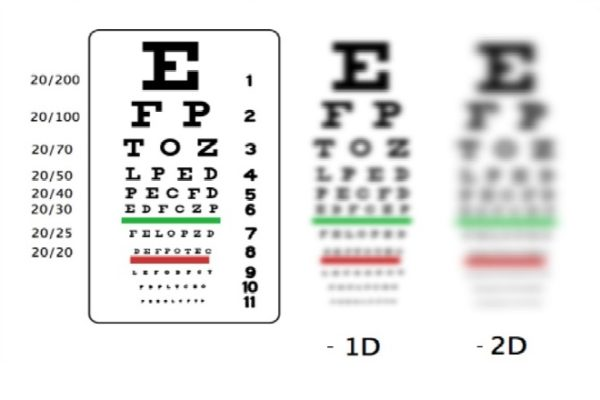

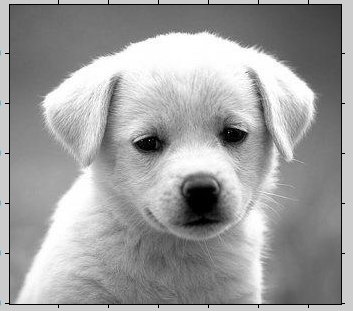

In [2]:
imgal = cv2.imread("bangchucai.jpg", 0)
imgdog = cv2.imread("dog.jpg", 0)
display(Image("bangchucai.jpg", width=200))
display(Image("dog.jpg", width=200))

In [4]:
# ideal low pass filter
def IdealLPF(M, N, F, cutoff):
    u = np.array(range(0, M))
    v = np.array(range(0, N))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = (U ** 2 + V ** 2) ** (1 / 2)

    H = (D <= cutoff)
    G = H * F

    imback = np.fft.ifft2(G)
    imback = np.uint8(np.real(imback))
    return imback

#gaussian low pass filter
def GaussianLPF(M, N, F, cutoff):
    u = np.array(range(0, M))
    v = np.array(range(0, N))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = (U ** 2 + V ** 2) ** (1 / 2)

    H = np.exp(((-1) * (D ** 2)) / (2 * (cutoff ** 2)))
    G = H * F

    imback = np.fft.ifft2(G)
    imback = np.uint8(np.real(imback))
    return imback

# ideal high pass filter
def IdealHPF(M, N, F, cutoff):
    u = np.array(range(0, M))
    v = np.array(range(0, N))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = (U ** 2 + V ** 2) ** (1 / 2)

    H = (D > cutoff)
    G = H * F

    imback = np.fft.ifft2(G)
    imback = np.uint8(np.real(imback))
    return imback

# gaussian high pass filter
def GaussianHPF(M, N, F, cutoff):
    u = np.array(range(0, M))
    v = np.array(range(0, N))
    idx = np.where(u > (M / 2))
    u[idx] = u[idx] - M
    idy = np.where(v > N / 2)
    v[idy] = v[idy] - N
    [V, U] = np.meshgrid(v, u)
    D = (U ** 2 + V ** 2) ** (1 / 2)

    H = 1 - np.exp(((-1) * (D ** 2)) / (2 * (cutoff ** 2)))
    G = H * F

    imback = np.fft.ifft2(G)
    imback = np.uint8(np.real(imback))
    return imback


# Kết quả

Kết quả thực thi đối với 4 hàm filter đã liệt kê ở trên, với mỗi hình tương ứng với 5 hình ảnh được hiển thị theo thứ tự
- Hình ảnh gốc
- Ideal Low Pass Filter
- Gaussian Low Pass Filter
- Ideal High Pass Filter
- Gaussian High Pass Filter

input image shape: (311, 311)


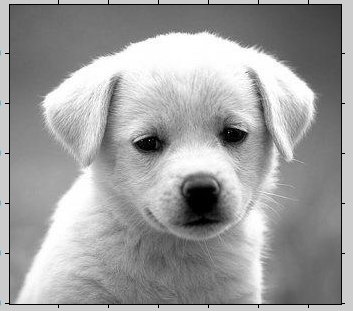

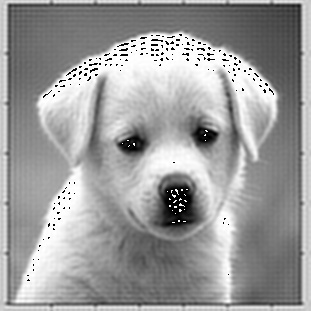

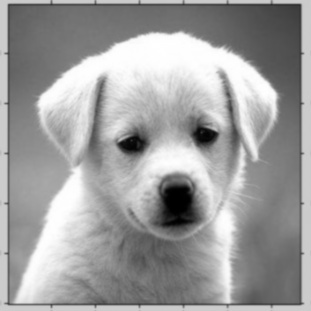

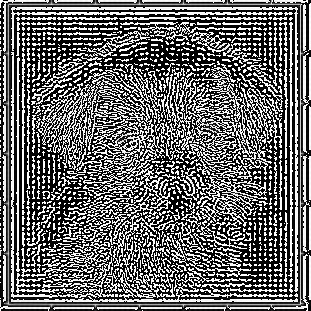

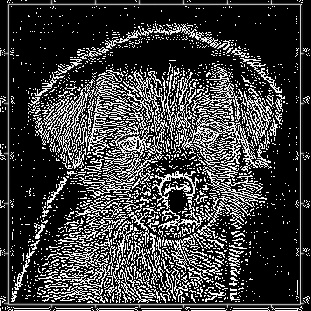

In [8]:
min = np.minimum(imgdog.shape[0], imgdog.shape[1])

imgdog = cv2.resize(imgdog, (min, min))
pixel_values = np.float32(imgdog)
print("input image shape: " + str(pixel_values.shape))

M, N = imgdog.shape

F = np.fft.fft2(imgdog)
cutoff = int(input("Enter Cut-off Frequency: "))

dogILPF = IdealLPF(M, N, F, cutoff)
dogGLPF = GaussianLPF(M, N, F, cutoff)
dogIHPF = IdealHPF(M, N, F, cutoff)
dogGHPF = GaussianHPF(M, N, F, cutoff)
# showing result
cv2.imwrite('ideal_low_pass_output.jpg', dogILPF)
cv2.imwrite('gaussian_low_pass_output.jpg', dogGLPF)
cv2.imwrite('ideal_high_pass_output.jpg', dogIHPF)
cv2.imwrite('gaussian_high_pass_output.jpg', dogGHPF)
display(Image("dog.jpg"))
display(Image("ideal_low_pass_output.jpg", alt="Ideal Low Pass Filter"))
display(Image("gaussian_low_pass_output.jpg", alt="Gaussian Low Pass Filter"))
display(Image("ideal_high_pass_output.jpg", alt="Ideal Low Pass Filter"))
display(Image("gaussian_high_pass_output.jpg", alt="Gaussian High Pass Filter"))

input image shape: (400, 400)


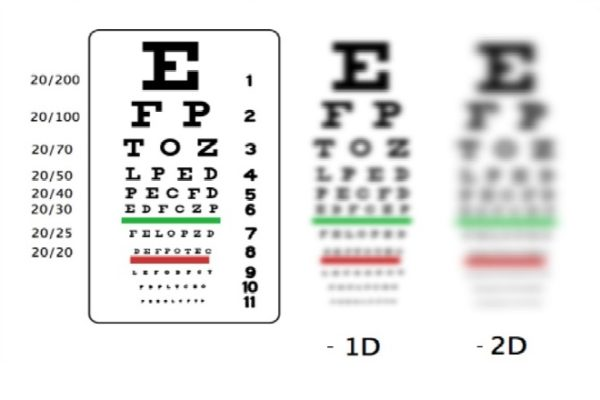

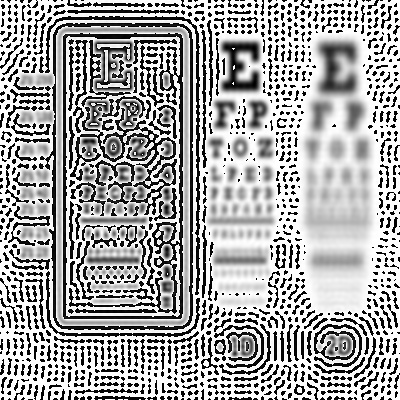

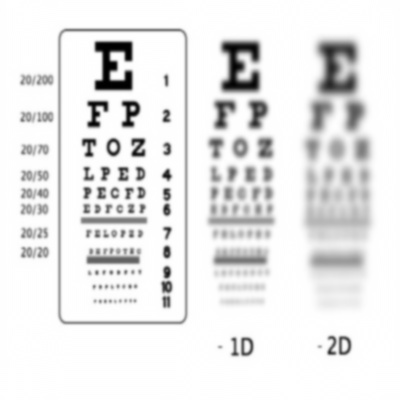

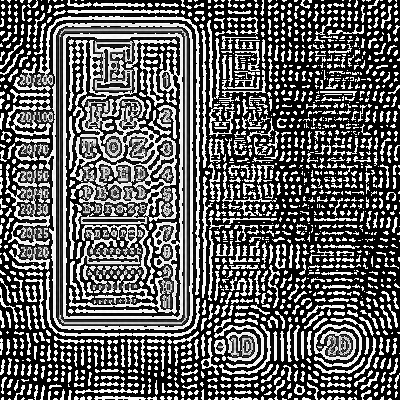

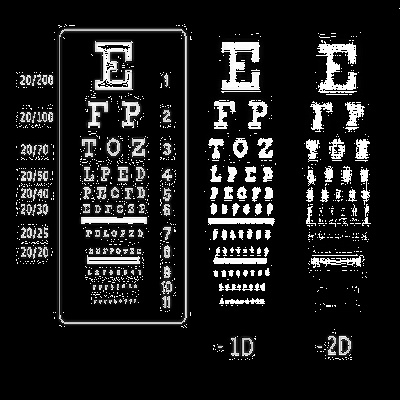

In [7]:
minal = np.minimum(imgal.shape[0], imgal.shape[1])

imgal = cv2.resize(imgal, (minal, minal))
pixel_values = np.float32(imgal)
print("input image shape: " + str(pixel_values.shape))

Mal, Nal = imgal.shape

Fal = np.fft.fft2(imgal)

alILPF = IdealLPF(Mal, Nal, Fal, cutoff)
alGLPF = GaussianLPF(Mal, Nal, Fal, cutoff)
alIHPF = IdealHPF(Mal, Nal, Fal, cutoff)
alGHPF = GaussianHPF(Mal, Nal, Fal, cutoff)
# showing result
cv2.imwrite('alphabet_ideal_low_pass_output.jpg', alILPF)
cv2.imwrite('alphabet_gaussian_low_pass_output.jpg', alGLPF)
cv2.imwrite('alphabet_ideal_high_pass_output.jpg', alIHPF)
cv2.imwrite('alphabet_gaussian_high_pass_output.jpg', alGHPF)
display(Image("bangchucai.jpg"))
display(Image("alphabet_ideal_low_pass_output.jpg", alt="Ideal Low Pass Filter"))
display(Image("alphabet_gaussian_low_pass_output.jpg", alt="Gaussian Low Pass Filter"))
display(Image("alphabet_ideal_high_pass_output.jpg", alt="Ideal Low Pass Filter"))
display(Image("alphabet_gaussian_high_pass_output.jpg", alt="Gaussian High Pass Filter"))

# Nhận xét, kết luận

## Nhận xét
- Khi thực hiện xử lí ảnh, các hàm lọc Low Pass Filter và High Pass Filter thực thi các tác vụ làm mịn (smoothing) và định hình (shaping) hình ảnh.
- Bài tập này, tôi sử dụng 2 loại hàm bộ lọc là Ideal Low/High Pass Filter và Gaussian Low/High Pass Filter, kết quả cho thấy khi sử dụng bộ lọc Gaussian, những hình ảnh được biến đổi trông tự nhiên hơn so với bộ lọc Ideal.
- Đối với hình alphabet.jpg, các vùng được cho là mịn sẵn (vùng -2D) khi thực hiện làm mịn hầu như không thay đổi so với ảnh gốc, khi định hình kết quả Gaussian High Pass Filter thể hiện định hình tốt trong khi Ideal High Pass Filter cho kết quả khó nhận dạng bằng mắt thường.

## Kết luận
- Với bài tập này, các nhiệm vụ bao gồm thêm các bộ lọc Low Pass Filter và High Pass Filter đã được hoàn thành. Hiện tại, bài tập mới chỉ giải quyết thêm các bộ lọc cho ảnh xám. Trong tương lai, tôi sẽ cố gắng thực hiện thêm các bộ lọc đối với ảnh màu.

# Repository

https://github.com/phii-1003/XLAS.git
(folder project2)